In [53]:
#import relevant packages and rename them
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error 
import re
from scipy.stats import ttest_ind

In [40]:
#import dataset containing containing gender
df_gender = pd.read_excel("C:/Users/Maya/Documents/Workshop Python/Dataset_Gender.xlsx")

In [41]:
#check properties of gender dataset
df_gender.head()
df_gender.shape # (10000, 13)
df_gender.describe
df_gender.dtypes

Column1        int64
index          int64
artist        object
gender        object
age            int64
type          object
country       object
city_1        object
district_1    object
city_2        object
district_2    object
city_3        object
district_3    object
dtype: object

In [42]:
#drop irrelevant columns from gender dataset
df_gender = df_gender.drop(['Column1','country','age','city_1','district_1','city_2','district_2','city_3','district_3'], axis=1)
df_gender

,index,artist,gender,type
0,0,Drake,male,person
1,1,Post Malone,male,person
2,2,Ed Sheeran,male,person
3,3,J Balvin,male,person
4,4,Bad Bunny,male,person
...,...,...,...,...
9995,4991,si_el_bien,NaN,NaN
9996,4992,Antonello Venditti,male,person
9997,4993,Lea Salonga,female,person
9998,4994,Vertical Horizon,mixed,group


In [43]:
#check which if there are NaN values and which columns consist of NaN values
df_gender.isnull().sum() # 1752
df_gender['artist'].isnull().sum() # 0
df_gender['gender'].isnull().sum() # 1752
df_gender['type'].isnull().sum() # 1752

1752

In [44]:
#considering that a large part of the data has NaN values, and checking by hand what the 'gender' and 'type' of the artists with NaN values is would require a lot of time, we decided to delete rows with NaN values from the gender dataset
df_gender = df_gender.dropna(axis=0)
df_gender

,index,artist,gender,type
0,0,Drake,male,person
1,1,Post Malone,male,person
2,2,Ed Sheeran,male,person
3,3,J Balvin,male,person
4,4,Bad Bunny,male,person
...,...,...,...,...
9994,4990,Klara Hammarström,female,person
9996,4992,Antonello Venditti,male,person
9997,4993,Lea Salonga,female,person
9998,4994,Vertical Horizon,mixed,group


In [45]:
#check possible values of 'type' and 'gender'
df_gender["gender"].unique() #'male', 'female', 'mix', 'other'
df_gender["type"].unique() # 'person', 'group' 

array(['person', 'group'], dtype=object)

In [46]:
#delete artists that are defined as 'person' in column 'type' as we don't want to include 'groups' for our analyses, and delete artists that are defined as 'other' in the column 'gender'
df_gender = df_gender[df_gender.type == 'person']
df_gender = df_gender[df_gender.gender != 'other']
df_gender

,index,artist,gender,type
0,0,Drake,male,person
1,1,Post Malone,male,person
2,2,Ed Sheeran,male,person
3,3,J Balvin,male,person
4,4,Bad Bunny,male,person
...,...,...,...,...
9993,4989,Nasty C,male,person
9994,4990,Klara Hammarström,female,person
9996,4992,Antonello Venditti,male,person
9997,4993,Lea Salonga,female,person


In [48]:
#check whether the former step was done correctly, by checking the values in the relevant columns
df_gender["gender"].unique() #'female', 'male'
df_gender["type"].unique() #'person'

array(['person'], dtype=object)

In [14]:
#import dataset containing music
df_music = pd.read_excel("C:/Users/Maya/Documents/Workshop Python/Dataset_Music.xlsx")

In [15]:
#check properties of music dataset
df_music.head()
df_music.shape # (2000, 18)
df_music.describe
df_music.dtypes
df_music.columns

Index(['artist', 'song', 'duration_ms', 'explicit', 'year', 'popularity',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'genre'],
      dtype='object')

In [16]:
#drop irrelevant columns from music dataset
df_music = df_music.drop(['duration_ms','danceability', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'energy'], axis=1)
df_music

,artist,song,explicit,year,popularity,genre
0,Britney Spears,Oops!...I Did It Again,False,2000,77,pop
1,blink-182,All The Small Things,False,1999,79,"rock, pop"
2,Faith Hill,Breathe,False,1999,66,"pop, country"
3,Bon Jovi,It's My Life,False,2000,78,"rock, metal"
4,*NSYNC,Bye Bye Bye,False,2000,65,pop
...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,False,2019,79,pop
1996,Taylor Swift,Cruel Summer,False,2019,78,pop
1997,Blanco Brown,The Git Up,False,2019,69,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),False,2019,75,pop


In [17]:
#check if there are NaN values in the music data set
df_music.isnull().sum() #0

artist        0
song          0
explicit      0
year          0
popularity    0
genre         0
dtype: int64

In [49]:
#combine datasets music and gender and drop irrelevant columns
df_combined = pd.merge(df_music, df_gender, on = "artist")
df_combined = df_combined.drop(['index', 'type'], axis = 1)
df_combined

,artist,song,explicit,year,popularity,genre,gender
0,Britney Spears,Oops!...I Did It Again,False,2000,77,pop,female
1,Britney Spears,Born to Make You Happy,False,1999,58,pop,female
2,Britney Spears,Lucky,False,2000,65,pop,female
3,Britney Spears,I'm a Slave 4 U,False,2001,69,pop,female
4,Britney Spears,Overprotected - Radio Edit,False,2001,61,pop,female
...,...,...,...,...,...,...,...
1228,Sech,Otro Trago,True,2019,71,latin,male
1229,Sech,Otro Trago,True,2019,71,latin,male
1230,Normani,Motivation,False,2019,71,"pop, R&B",female
1231,Joel Corry,Sorry,False,2019,63,"pop, Dance/Electronic",male


In [50]:
#check whether the merge was done correctly by checking whether the intersection value matches the value of the combined data set
print(len(df_music['artist'].unique()))
print(len(df_gender['artist'].unique()))
print(len(df_combined['artist'].unique()))
len(set(df_gender['artist'].unique()).intersection(set(df_music['artist'].unique())))

835
5863
386


386

In [95]:
#delete duplicate values in 'artist' by sorting 'popularity' and keeping the most populair song from the duplicate artists
df_combined = df_combined.sort_values(by = 'popularity', ascending = False)
df_combined = df_combined.drop_duplicates(subset = 'artist', keep = "first")
df_combined # (388,7)

,artist,song,explicit,year,popularity,genre,gender
881,Tom Odell,Another Love,1,2013,88,pop,male
23,Eminem,Without Me,1,2002,87,hip hop,male
1097,Billie Eilish,lovely (with Khalid),0,2018,86,"pop, Dance/Electronic",female
733,Bruno Mars,Locked out of Heaven,0,2012,85,pop,male
1142,Post Malone,Circles,0,2019,85,hip hop,male
...,...,...,...,...,...,...,...
848,Grimes,Oblivion,0,2012,0,"pop, rock, Dance/Electronic",female
844,Otto Knows,Million Voices - Radio Edit,0,2012,0,"pop, Dance/Electronic",male
843,Michel Teló,Ai Se Eu Te Pego - Live,0,2012,0,"country, latin",male
1004,Silentó,Watch Me (Whip / Nae Nae),0,2015,0,hip hop,male


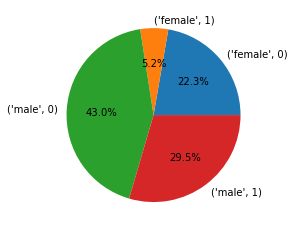

In [100]:
#transform boolean values in 'explicit' to integers (True = 1, False = 0) to prepare data for visualization
df_combined["explicit"] = df_combined["explicit"].astype(int)

##########MOET WORDEN AANGEPAST -> TWEE APARTE PIE CHARTS count songs with (= 1) and without (= 0) explicit content and create a piechart
explicit_piechart = df_combined.groupby('gender')['explicit'].value_counts()
plt.pie(explicit_piechart, labels=explicit_piechart.index, autopct='%.1f%%')
plt.show()

In [78]:
#count the amount of male and female artists
df_combined['gender'].value_counts()['male'] #796
df_combined['gender']. value_counts()['female'] #437

437

In [82]:
#perform t-test to find out whether male or female artists use more explicit content in their songs and start by defining samples
group_male = df_combined[df_combined['gender']=='male']
group_female = df_combined[df_combined['gender']=='female']

#check the mean (=m) and standard deviation (=sd) of each group for the column 'explicit'
##########MOET WORDEN AANGEPAST -> T-TEST ALLEEN VOOR EXPLICIT SONGS
male_mean = group_male['explicit'].mean()
male_sd = group_male['explicit'].std() #mean = 0.416, sd = 0.493
female_mean = group_female['explicit'].mean()
female_sd = group_female['explicit'].std() #mean = 0.197, sd = 0.398

#perform the t-test -> as can be seen there is no significant difference
ttest_ind(group_male['explicit'], group_female['explicit'])

Ttest_indResult(statistic=7.967868329603983, pvalue=3.652295278880298e-15)

<ErrorbarContainer object of 3 artists>

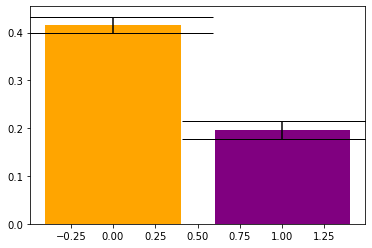

In [74]:
#plot bargraphs to visualize the data and the results of the t-test
plt.bar(0, male_mean, color = "orange") 
plt.bar(1, female_mean, color = "purple")

#calculate the standard errors
se1 = male_sd/np.sqrt(len(group_male)) 
se2 = female_sd/np.sqrt(len(group_female))

#include mean and standarderrors in the graph -> as can be seen, the standarderrors don't overlap, meaning that there indeed is no significant difference between female and male artists when using explicit content
plt.errorbar(0, male_mean, se1, capsize=100, color="black") 
plt.errorbar(1, female_mean, se2, capsize=100, color="black")